In [11]:
# !pip install nuscenes-devkit==1.1.9 &> /dev/null  # Install nuScenes.

In [ ]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version="v1.0-eval", dataroot="./data/nuscenes_eval" , verbose=True)

Loading NuScenes tables for version v1.0-eval...
0 category,
0 attribute,
0 visibility,
0 instance,
12 sensor,
12 calibrated_sensor,
1 ego_pose,
1 log,
1 scene,
41 sample,
9559 sample_data,
0 sample_annotation,
1 map,
Done loading in 0.018 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.
Loading NuScenes tables for version v1.14...
23 category,
8 attribute,
4 visibility,
1893 instance,
12 sensor,
98 calibrated_sensor,
1884 ego_pose,
1 log,
7 scene,
24 sample,
1884 sample_data,
1095 sample_annotation,
1 map,
Done loading in 0.070 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [79]:
#データセット内に含まれる全シーンの一覧を取得する
nusc.list_scenes()

scene-0-1, test1 [70-01-01 00:01:34]    5s, chengdu, #anns:1
scene-1-1, test2 [70-01-01 00:01:44]    5s, chengdu, #anns:1
scene-2-1, test  [70-01-01 00:01:54]   15s, chengdu, #anns:203
scene-2-2, test  [70-01-01 00:02:14]   15s, chengdu, #anns:174
scene-2-3, test  [70-01-01 00:02:34]   15s, chengdu, #anns:183
scene-2-4, test  [70-01-01 00:02:55]   15s, chengdu, #anns:144
scene-2-5, test  [70-01-01 00:03:15]   15s, chengdu, #anns:119


{'name': 'scene-0-1', 'token': '36aa5ad7885795f7927aacb4058597d0', 'description': 'test1', 'log_token': '665506c2ab2f1d4e117306a4547292d3', 'nbr_samples': 2, 'first_sample_token': 'f462975c0c53619e019d5201a8fa8a83', 'last_sample_token': '79682dfa5ec2135c8931daca06dd57d8'}
f462975c0c53619e019d5201a8fa8a83


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 2: invalid start byte

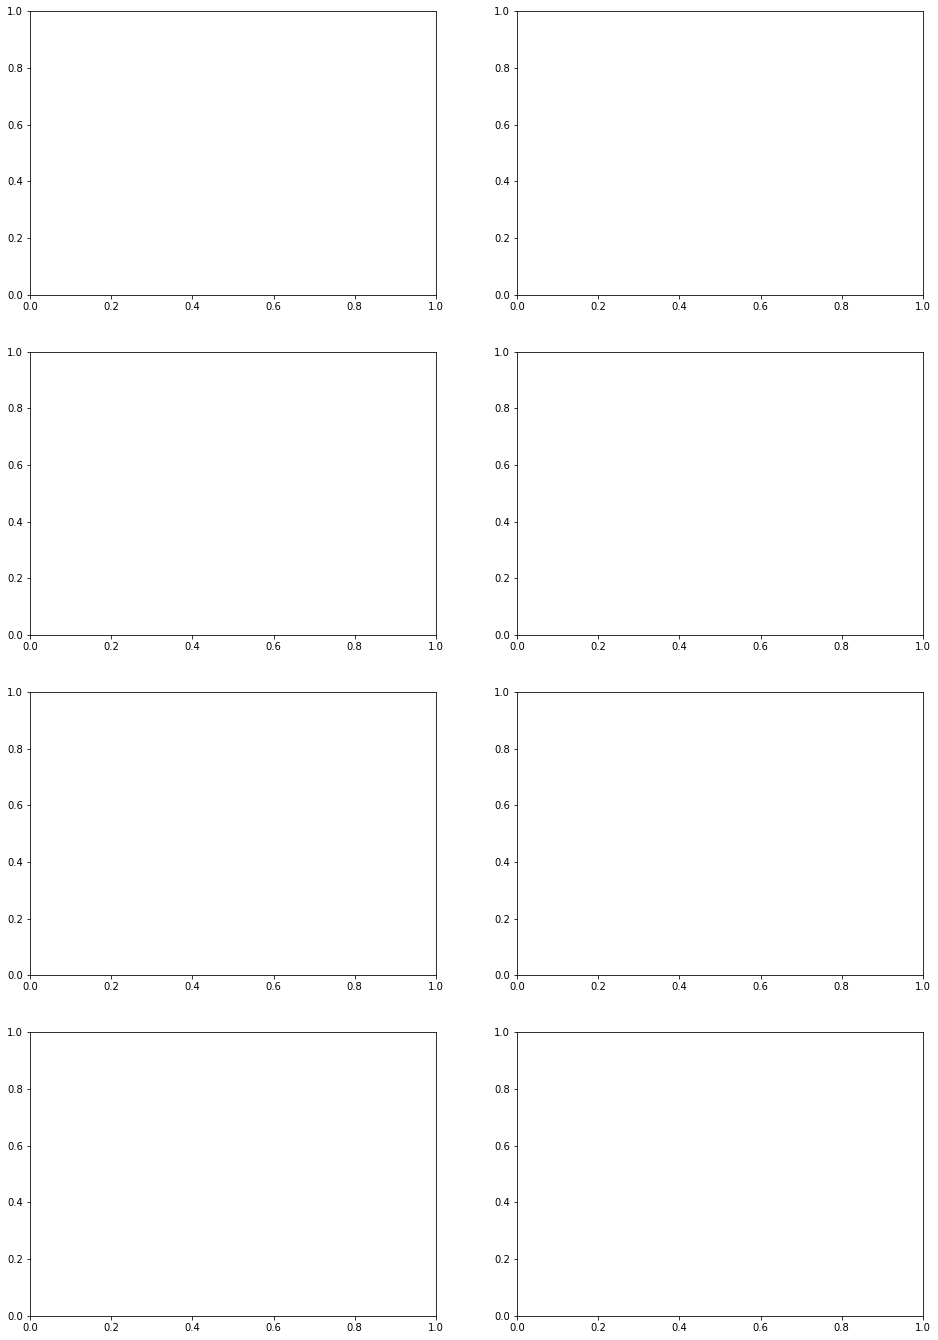

In [80]:
# 最初のシーンを取得
scene = nusc.scene[0]
print(scene)

# 最初の sample_token を取得
first_sample_token = scene['first_sample_token']
print(first_sample_token)
from nuscenes.utils.data_classes import RadarPointCloud
# RadarPointCloud.disable_filters()   # これで ambig_state や dynprop のフィルタを全部OFF

# sample を可視化（画像 or LiDAR にバウンディングボックス付き）
nusc.render_sample(first_sample_token)


In [81]:
my_sample = nusc.get('sample', first_sample_token)
print(my_sample)

{'token': 'f462975c0c53619e019d5201a8fa8a83', 'timestamp': 94588196, 'prev': '', 'next': '79682dfa5ec2135c8931daca06dd57d8', 'scene_token': '36aa5ad7885795f7927aacb4058597d0', 'data': {'CAM_FRONT': 'd1235c4cbcceb9b77fb368c14ee45fe0', 'CAM_FRONT_RIGHT': 'ca700ebb6592ff4bc0514ba04a45a5ae', 'CAM_FRONT_LEFT': 'ed8db79e8ee9d964df8b936a1488034a', 'CAM_BACK_LEFT': '3114310d666264bbd7f7f3c146264028', 'CAM_BACK': '68552951734d4d071b42b17bc665c397', 'CAM_BACK_RIGHT': 'ebc2552941c13938b0a08ec6eaa9e4ba', 'RADAR_FRONT': '06c477f94b9b84e641fd1f89ba378e6e', 'RADAR_FRONT_RIGHT': 'dffbb0c14c95efdf432d82dd781ccffd', 'RADAR_FRONT_LEFT': 'cb6f4bd9c11c89ac7c00a07757810db6', 'RADAR_BACK_RIGHT': '17a6cd91044f83e2626dda625b1411b0', 'RADAR_BACK_LEFT': 'd42d9e5ddc79f17813f78703d61de9ab', 'LIDAR_TOP': '384a602e37260d604c4e37949d9ae080'}, 'anns': ['5d193043807c1efa7d0263fc0ec630db']}


In [82]:
# 指定した サンプル（1フレーム） に含まれる 全てのセンサーデータ（sample_data） を一覧表示する
# どのセンサで撮像されたものか、どういったアノテーション情報が含まれているか
nusc.list_sample(my_sample['token'])

Sample: f462975c0c53619e019d5201a8fa8a83

sample_data_token: d1235c4cbcceb9b77fb368c14ee45fe0, mod: camera, channel: CAM_FRONT
sample_data_token: ca700ebb6592ff4bc0514ba04a45a5ae, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: ed8db79e8ee9d964df8b936a1488034a, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: 3114310d666264bbd7f7f3c146264028, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: 68552951734d4d071b42b17bc665c397, mod: camera, channel: CAM_BACK
sample_data_token: ebc2552941c13938b0a08ec6eaa9e4ba, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 06c477f94b9b84e641fd1f89ba378e6e, mod: radar, channel: RADAR_FRONT
sample_data_token: dffbb0c14c95efdf432d82dd781ccffd, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: cb6f4bd9c11c89ac7c00a07757810db6, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 17a6cd91044f83e2626dda625b1411b0, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: d42d9e5ddc79f17813f78703d61de9ab, mod: radar, chan

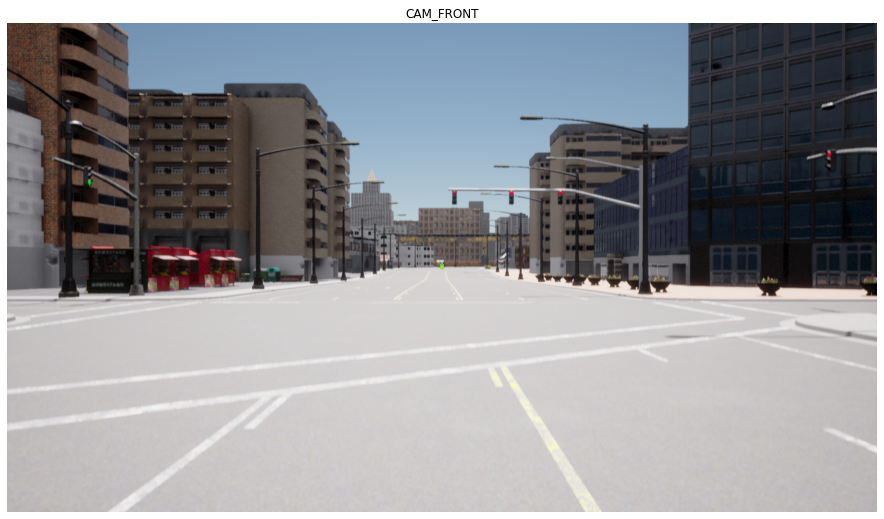

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
nusc.explorer.render_pointcloud_in_image(
    my_sample['token'],
    pointsensor_channel='LIDAR_TOP',
    camera_channel='CAM_FRONT',     # 必要なら別CAMに
    render_intensity=True,
    ax=ax                           # ここで渡す
)
plt.show()
